In [43]:
# -*- coding:utf-8 -*-
from scipy import stats

[k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)]

['genhalflogistic',
 'triang',
 'kappa3',
 'rayleigh',
 'betaprime',
 'foldnorm',
 'genlogistic',
 'gilbrat',
 'genpareto',
 'lognorm',
 'anglit',
 'truncnorm',
 'expon',
 'norm',
 'nakagami',
 'weibull_min',
 'invgauss',
 'logistic',
 'ncx2',
 'halfnorm',
 'fisk',
 'halfgennorm',
 'tukeylambda',
 'frechet_l',
 'dgamma',
 'pareto',
 'halflogistic',
 'semicircular',
 'invweibull',
 'ksone',
 'mielke',
 't',
 'gengamma',
 'johnsonsu',
 'powernorm',
 'powerlaw',
 'burr',
 'johnsonsb',
 'wrapcauchy',
 'argus',
 'genextreme',
 'gamma',
 'wald',
 'ncf',
 'arcsine',
 'maxwell',
 'gausshyper',
 'rice',
 'alpha',
 'vonmises_line',
 'loglaplace',
 'exponweib',
 'pearson3',
 'chi',
 'burr12',
 'cosine',
 'kstwobign',
 'recipinvgauss',
 'levy_stable',
 'beta',
 'foldcauchy',
 'truncexpon',
 'genexpon',
 'erlang',
 'reciprocal',
 'f',
 'lomax',
 'loggamma',
 'invgamma',
 'laplace',
 'powerlognorm',
 'vonmises',
 'exponnorm',
 'frechet_r',
 'rdist',
 'dweibull',
 'gumbel_r',
 'gompertz',
 'halfcauch

In [44]:
stats.norm.stats()

(array(0.0), array(1.0))

In [45]:
X = stats.norm(loc=1.0, scale=2.0)
X.stats()

(array(1.0), array(4.0))

In [46]:
import numpy as np
x = X.rvs(size=10000)
np.mean(x), np.var(x)

(1.0101596716822403, 4.0300488542448747)

In [47]:
print np.max(x), np.min(x)
print stats.norm.fit(x)

8.36757212764 -5.95784994476
(1.0101596716822403, 2.0074981579679902)


In [48]:
pdf, t = np.histogram(x, bins=100, normed=True)
# print t
t = (t[:-1] + t[1:]) * 0.5 # （从0到最后 + 从1到最后）/ 2 求每个区间的中点位置
# print t
cdf = np.cumsum(pdf) * (t[1] - t[0])
p_error = pdf - X.pdf(t)
c_error = cdf - X.cdf(t)
print "max pdf error: {}, max cdf error: {}".format(np.abs(p_error).max(), np.abs(c_error).max())

max pdf error: 0.0307009941378, max cdf error: 0.0149770556375


In [49]:
x = range(1, 7)
p = (0.4, 0.2, 0.1, 0.1, 0.1, 0.1)

dice = stats.rv_discrete(values=(x, p))
dice.rvs(size=20)

array([1, 1, 2, 1, 3, 5, 4, 1, 2, 1, 1, 1, 3, 4, 1, 1, 1, 6, 1, 2])

In [50]:
np.random.seed(42)
samples = dice.rvs(size=(20000, 50))
samples_mean = np.mean(samples, axis=1)
print samples_mean
print dice.stats()
print stats.norm.fit(samples_mean) # 期望为μ，方差为σ/n

[ 2.32  2.64  2.56 ...,  2.46  2.96  2.68]
(array(2.6), array(3.04))
(2.6013379999999997, 0.248077185077548)


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


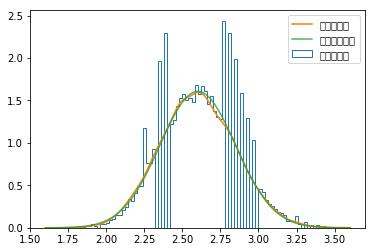

In [52]:
#coding:utf-8
import matplotlib.pyplot as pl

pl.rcParams['font.sans-serif']=['SimHei']
pl.rcParams['axes.unicode_minus']=False

_, bins, step = pl.hist(samples_mean, bins=100, normed=True, histtype="step", label=u"直方图统计")
kde = stats.kde.gaussian_kde(samples_mean)
x = np.linspace(bins[0], bins[-1], 100)
pl.plot(x, kde(x), label=u"核密度估计")
mean, std = stats.norm.fit(samples_mean)
pl.plot(x, stats.norm(mean, std).pdf(x), alpha=0.8, label=u"正态分布拟合")
pl.legend()
pl.show()